# 1. Dimension Reduction Using Eigenface and Classification Using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data
데이터는 `sklearn.datasets`의 `fetch_lfw_people`로 다운로드

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
data, target = faces["data"], faces["target"]

### 1.2 EDA

In [3]:
# 이미지의 height와 width 확인
n_samples, h, w = faces.images.shape
n_samples, h, w

(1288, 50, 37)

In [4]:
# 얼굴 주인들의 이름 확인
target_names = faces.target_names
n_classes = target_names.shape[0]

target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

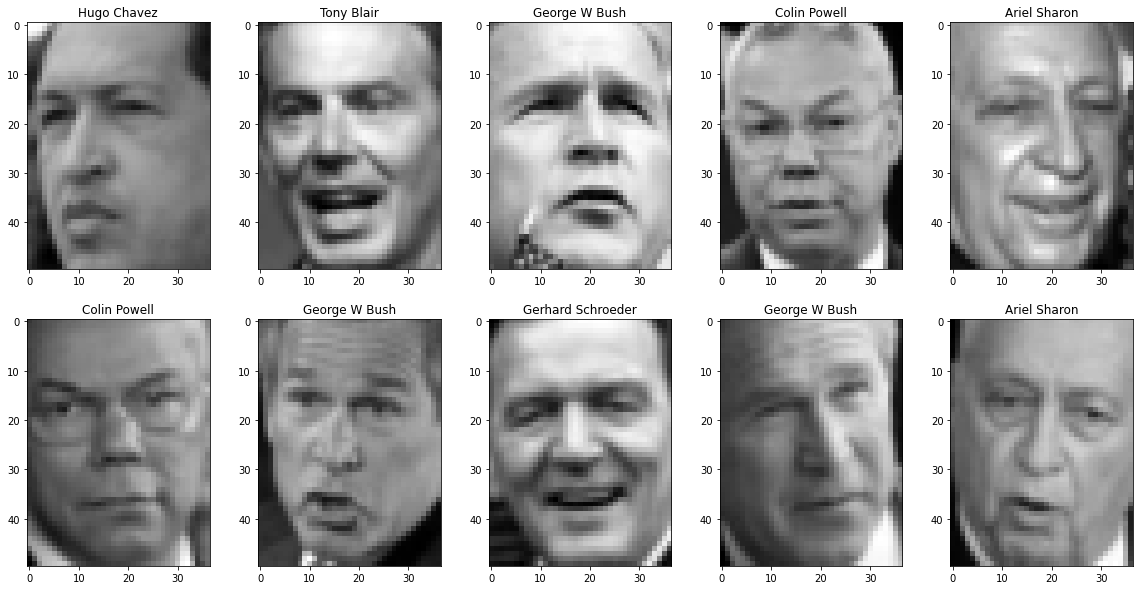

In [5]:
# 이미지 실제 확인
samples = data[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(target_names[target[idx]])

### 1.3 Split

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021)

In [7]:
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 901, 0.70
test_data size: 387, 0.30


### 1.4 Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)

StandardScaler()

In [9]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

# 2. Eigenface
Eigenface란 PCA를 이용해 얼굴 사진을 축소하면 생기는 eigenvector가 얼굴 모양과 같다고 하여서 생긴 용어  
직접 실습을 통해 Eigenface를 생성

### 2.1 Learning
PCA를 이용해 데이터 압축

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_data)

PCA()

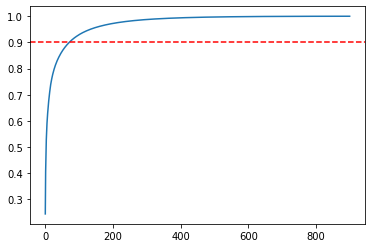

In [11]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(0.9, color="red", linestyle="--")

In [12]:
# explained variance ratio가 0.9가 되는 지점의 component를 사용
pca = PCA(n_components=0.9)
pca.fit(scaled_train_data)

PCA(n_components=0.9)

In [13]:
pca_train_data = pca.transform(scaled_train_data)
pca_test_data = pca.transform(scaled_test_data)

### 2.2 Visualization
PCA를 통해 다음 eigen vector에 나오는 얼굴의 특징을 추출

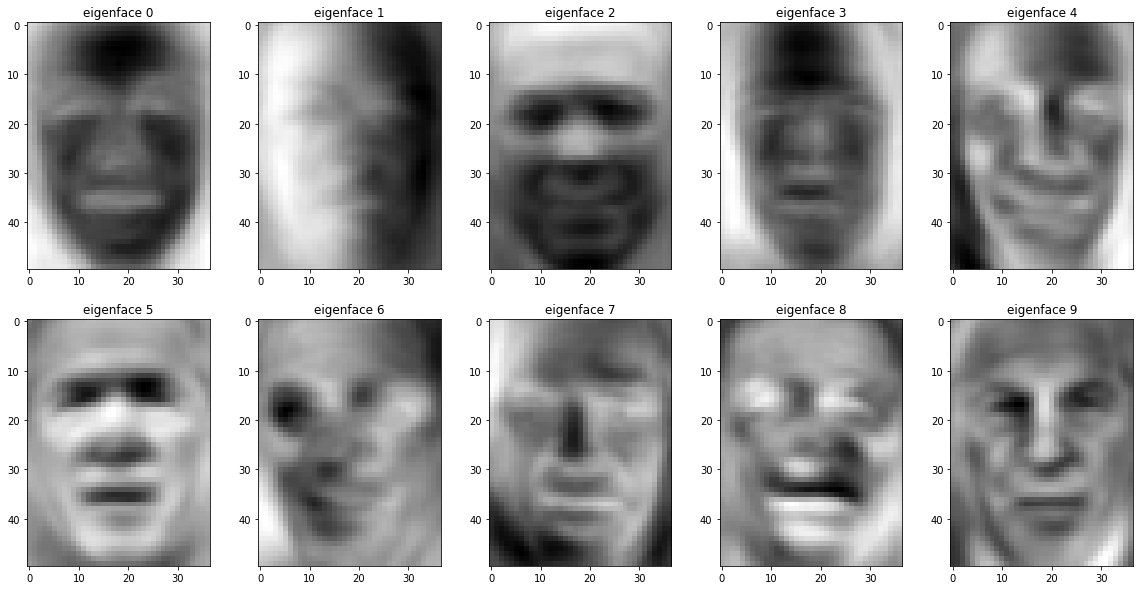

In [14]:
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
samples = eigenfaces[:10].reshape(10, h, w)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(f"eigenface {idx}")

# 3. SVM

### 3.1 Raw Data
앞선 SVM 실습에서 진행했던 Baseline의 결과

In [15]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(scaled_train_data, train_target)

SVC()

In [16]:
train_pred = svm.predict(scaled_train_data)
test_pred = svm.predict(scaled_test_data)

In [17]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.9567
test accuracy is 0.7364


### 3.2 Eigenface
Eigenface로 추출된 특징만으로 SVM을 학습시킨 후 결과를 확인

In [18]:
eigenface_svm = SVC()
eigenface_svm.fit(pca_train_data, train_target)

SVC()

In [19]:
pca_train_pred = eigenface_svm.predict(pca_train_data)
pca_test_pred = eigenface_svm.predict(pca_test_data)

pca_train_acc = accuracy_score(train_target, pca_train_pred)
pca_test_acc = accuracy_score(test_target, pca_test_pred)

print(f"Eigenface train accuracy is {pca_train_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Eigenface train accuracy is 0.9390
Eigenface test accuracy is 0.7339


### 4. Summary

In [20]:
print(train_data.shape)
print(pca_train_data.shape)

(901, 1850)
(901, 72)


In [21]:
print(f"Baseline test accuracy is {test_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Baseline test accuracy is 0.7364
Eigenface test accuracy is 0.7339
